## In this notebook the price of a house depends on various features were predicted.

## Importing the module

In [1]:
import pandas as pd
import numpy as np
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Loading the csv file

In [2]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Converting yes/no condition in the independent variables to 1/0 so that I can find the linear regression with the dependent variable

In [3]:
data["mainroad"].replace(["yes","no"],["1","0"],inplace=True)
data["guestroom"].replace(["yes","no"],["1","0"],inplace=True)
data["basement"].replace(["yes","no"],["1","0"],inplace=True)
data["hotwaterheating"].replace(["yes","no"],["1","0"],inplace=True)
data["airconditioning"].replace(["yes","no"],["1","0"],inplace=True)
data["prefarea"].replace(["yes","no"],["1","0"],inplace=True)
data["furnishingstatus"].replace(["furnished","semi-furnished","unfurnished"],["1","0.5","0"],inplace=True)

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


## Checking the correlation between the dependent variable and the independent variables

In [5]:
data.corr()["price"]

price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

## Importing the datas to a list

In [6]:
x=data.columns.tolist()
y="price"
print(x)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


## Removing price from the list so that it does not compare with itself.

In [7]:
x.remove("price")

In [8]:
print(x)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


## Importing the values of the independent variables and the dependent variable to the variables x1 and y1 respectively.

In [9]:
x1=data[x].values
y1=data[y].values

## Splitting the datas into training (80% of total datas) and testing (20% of total datas) sections.

In [10]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

## MinMaxScaler() function is used to transform the data in the range of 0 to 1 

In [11]:
scaler=MinMaxScaler()
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

## Finding the linear regression

In [12]:
regression=LinearRegression()
regression.fit(x1_train,y1_train)

LinearRegression()

## Predicting the dependent variable (price) from the test section of the independent variables.

In [13]:
y1_prediction=regression.predict(x1_test)

In [14]:
print(np.mean(y1_prediction))

4806297.777163248


In [15]:
print(np.mean(y1_test))

4723105.504587156


In [16]:
print(np.std(y1_prediction))

1555673.9889106872


## Finding the Root Mean Squared Error in predicted price. 

In [17]:
math.sqrt(mean_squared_error(y1_test,y1_prediction))

992996.3765744687

## Finding the R^2 value.

In [ ]:
r2_score(y1_test,y1_prediction)

## Plotting the graph between predicted price and the test portion of the actual price.

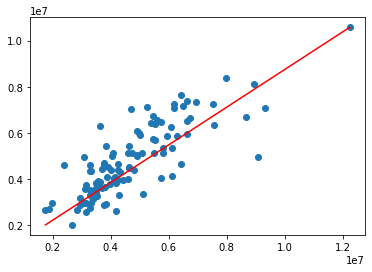

In [19]:
plt.scatter(y1_test,y1_prediction)
plt.plot([min(y1_test),max(y1_test)],[min(y1_prediction),max(y1_prediction)],color="red")

## First the correlation between the dependent variable and the independent variables were checked in order to make sure that they are correlated to each other. After predicting the dependent variables the R^2 value between the predicted values and the original values was found which appeared to be around 66%. So, finally it can be concluded that the price of a house can be predicted to some extent if we know the considered independent variables (bathrooms,bedroom,parking, stories, mainroad, guestroom,	basement, hot water heating,  air conditioning, prefarea, furnishing status).

### Reference: 1. Notebooks provided by Prof. Dr. Christina B. Claß.